<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment3_Q2_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# RAJIT_BASU_20MAI0019
# GitHub Link

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment3_Q2_20MAI0019.ipynb

In [3]:
# import libaries
import keras
from keras.models import Sequential
import keras.layers as layers
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
np.random.seed(1000)

In [4]:
# load dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [5]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


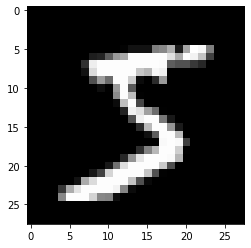

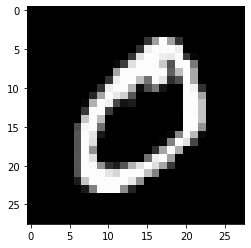

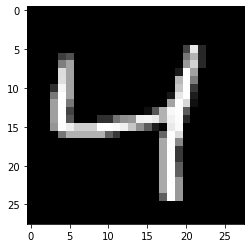

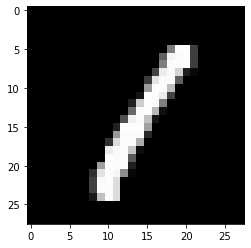

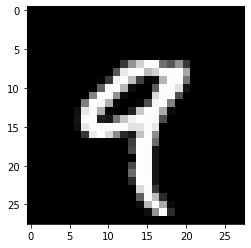

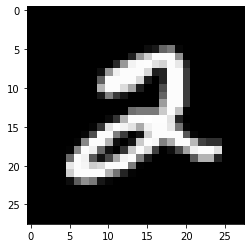

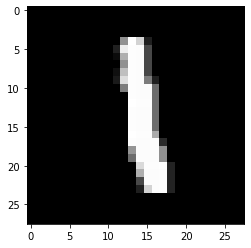

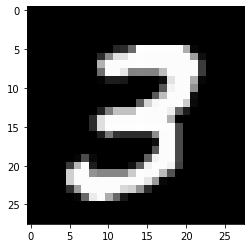

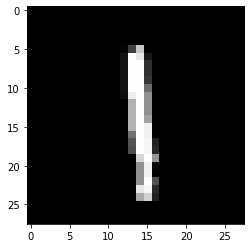

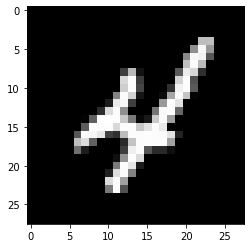

In [6]:
# diplay 10 images
for i in range(10):
    img = train_img[i].reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()

In [7]:
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)

In [8]:
# one hot encoding
train_lab_one_hot = to_categorical(train_lab)
test_lab_one_hot = to_categorical(test_lab)
print(train_lab_one_hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
#load cnn model
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu',input_shape=(14, 14, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [24]:
#Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist = model.fit(train_img, train_lab_one_hot,
            validation_data=(test_img, test_lab_one_hot),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.0647 - val_accuracy: 0.9799
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9828 - val_loss: 0.0622 - val_accuracy: 0.9822
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.0621 - val_accuracy: 0.9836


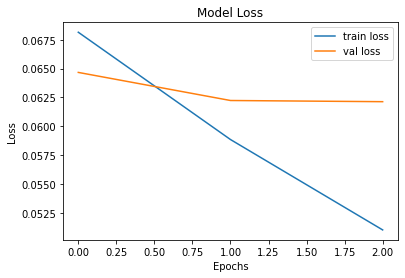

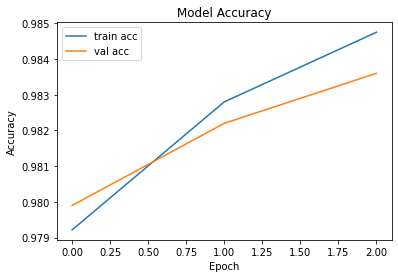

In [27]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
print(model.evaluate(test_img, test_lab_one_hot))

313/313 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.9836
[0.062134381383657455, 0.9836000204086304]


In [32]:
pred = model.predict(test_img[:10])
pred

array([[6.77840996e-15, 2.45807730e-09, 2.28342219e-06, 2.51998689e-08,
        1.92576223e-07, 4.08295273e-12, 1.03793086e-13, 9.99996662e-01,
        3.21204979e-10, 7.81600875e-07],
       [3.39520391e-11, 1.40692430e-06, 9.99995470e-01, 2.93142375e-06,
        2.11123581e-08, 9.07658768e-13, 6.16229912e-08, 1.56438311e-08,
        2.98138829e-08, 3.45128960e-11],
       [2.35737723e-08, 9.99998331e-01, 9.72484937e-09, 1.76169343e-10,
        1.55402358e-06, 1.17618781e-09, 1.33380320e-08, 5.23844612e-08,
        2.07802830e-10, 9.57782387e-09],
       [9.99999881e-01, 1.07136758e-10, 8.75629453e-08, 1.53341451e-09,
        7.85893961e-10, 2.87736857e-09, 1.16451995e-08, 3.97436608e-08,
        1.59765878e-09, 5.89788840e-09],
       [5.03183259e-12, 1.28489530e-09, 6.00628436e-10, 9.68465499e-12,
        9.99979973e-01, 3.18365279e-10, 4.79553989e-07, 2.55811394e-09,
        1.13343404e-07, 1.94184668e-05],
       [6.32097183e-08, 9.99999166e-01, 1.63629088e-09, 8.62504443e-11,
   

In [33]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


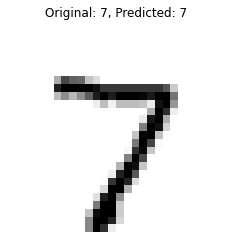

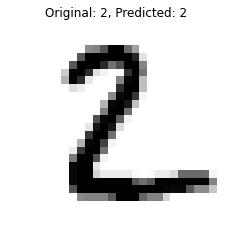

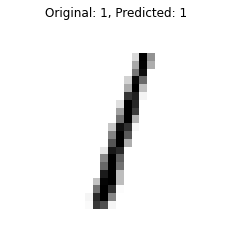

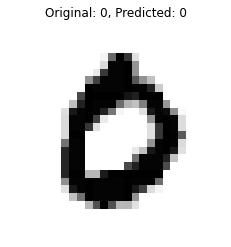

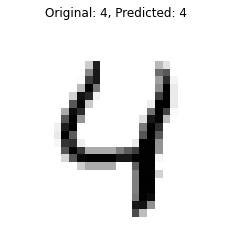

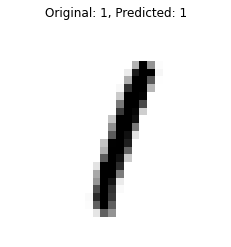

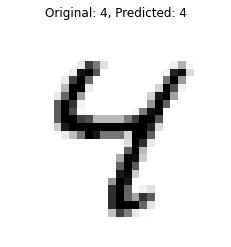

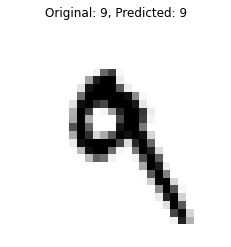

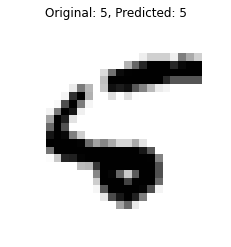

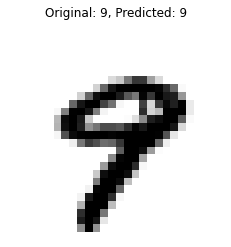

<Figure size 432x288 with 0 Axes>

In [34]:
#Visualizing prediction
for i in range(10):
  plt.imshow(test_img[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()